# Workspace Setup

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Seaborn Imports
import seaborn as sn 
from seaborn import distplot

# Tensorflow Imports
import tensorflow as tf
from tensorflow.keras.metrics import AUC
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Flatten, Dense,Conv2D, Dropout, MaxPooling2D

# Scikit-Learn imports
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data Importing 

In [0]:
# Getting Filepath of the data
filepath = '/content/drive/My Drive/EE 16-17 FYP DL Energy Theft Detection/Data/full-processing-data/outliersRemoved.csv'

In [0]:
# Reading data
raw_data = pd.read_csv(filepath)
raw_data.head()

,CONS_NO,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,2014-01-11,2014-01-12,2014-01-13,2014-01-14,2014-01-15,2014-01-16,2014-01-17,2014-01-18,2014-01-19,2014-01-20,2014-01-21,2014-01-22,2014-01-23,2014-01-24,2014-01-25,2014-01-26,2014-01-27,2014-01-28,2014-01-29,2014-01-30,2014-01-31,2014-02-01,2014-02-02,2014-02-03,2014-02-04,2014-02-05,2014-02-06,2014-02-07,...,2016-09-22,2016-09-23,2016-09-24,2016-09-25,2016-09-26,2016-09-27,2016-09-28,2016-09-29,2016-09-30,2016-10-01,2016-10-02,2016-10-03,2016-10-04,2016-10-05,2016-10-06,2016-10-07,2016-10-08,2016-10-09,2016-10-10,2016-10-11,2016-10-12,2016-10-13,2016-10-14,2016-10-15,2016-10-16,2016-10-17,2016-10-18,2016-10-19,2016-10-20,2016-10-21,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0387DD8A07E07FDA6271170F86AD9151,1,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,...,8.56,10.48,8.20,12.53,7.90,8.58,10.12,9.96,7.60,18.19,10.93,11.41,19.92,10.70,9.20,6.77,6.760000,6.150000,6.500000,8.080000,7.97,8.810000,7.370000,11.720000,11.020000,8.180000,7.330000,6.710000,8.520000,6.310000,7.18,8.070000,8.090000,9.530000,5.480000,8.750000,9.300000,7.540000,9.160000,6.740000
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.34,13.483126,13.483126,13.483126,13.483126,12.73,13.483126,13.483126,13.483126,13.483126,13.483126,13.483126,13.483126,13.483126,13.483126,10.95,13.483126,13.483126,13.483126,13.483126,13.483126,13.483126,13.483126,13.483126,13.483126
3,B32AC8CC6D5D805AC053557AB05F5343,1,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,...,17.30,16.95,8.25,22.76,14.07,20.70,6.50,9.99,18.59,16.79,26.82,14.70,16.05,24.10,12.64,10.85,11.770000,13.030000,12.260000,15.660000,13.43,15.030000,14.610000,13.970000,15.070000,14.110000,14.770000,11.720000,11.730000,11.980000,12.81,15.120000,17.260000,14.910000,19.590000,20.790000,17.950000,19.260000,14.460000,11.720000
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.9,5.64,6.99,3.32,3.61,5.35,4.73,3.68,3.53,3.42,3.81,4.58,3.56,4.25,3.86,3.53,3.41,0.85,0.88,3.81,6.51,9.19,7.79,7.02,7.25,6.37,6.43,7.89,7.46,7.95,7.59,4.84,6.06,5.6,6.72,7.29,5.6,6.28,...,9.56,9.48,10.60,10.06,10.79,10.91,17.77,10.37,13.51,14.13,17.44,15.96,12.18,18.54,13.44,11.68,9.150000,9.160000,10.190000,10.310000,8.03,10.080000,10.340000,11.240000,15.140000,14.360000,12.390000,10.360000,9.290000,7.910000,14.21,10.220000,8.470000,6.110000,6.100000,6.730000,7.520000,10.890000,9.860000,8.720000


In [0]:
# Column 2 onwards are kWhs, column 1 is the FLAG
kWhs = raw_data.iloc[:, 2:]
labels = raw_data.iloc[:, 1]

NUM_CONSUMERS, NUM_DAYS = kWhs.shape
print(NUM_CONSUMERS, NUM_DAYS)


42372 1034


# PCA without Scaling


In [0]:
# Applying PCA on raw Data
pca = PCA(n_components=0.95, svd_solver='full')
X_reduced = pca.fit_transform(kWhs)

In [0]:
# Checking the Dimension of reduced data
X_reduced.shape

(42372, 10)

In [0]:
# Checking variance of each Dimension
pca.explained_variance_ratio_

array([0.62006104, 0.12212078, 0.07901392, 0.03239373, 0.02937368,
       0.02772248, 0.01781337, 0.01068211, 0.00728117, 0.0067785 ])

In [0]:
# Applying Randomized PCA on raw Data
rnd_pca = PCA(n_components = 15, svd_solver = 'randomized')
X_reduced_rnd = rnd_pca.fit_transform(kWhs)

In [0]:
# Dimension check
X_reduced_rnd.shape

(42372, 15)

In [0]:
# Variance Check
rnd_pca.explained_variance_ratio_

array([0.62006104, 0.12212078, 0.07901392, 0.03239373, 0.02937368,
       0.02772248, 0.01781337, 0.01068211, 0.00728117, 0.0067785 ,
       0.00495273, 0.0042692 , 0.00403223, 0.00386527, 0.00336026])

In [0]:
#lle = LocallyLinearEmbedding(n_components = 15, n_neighbors = 10)
#X_lle = lle.fit_transform(kWhs)

# PCA with Scaling

## Scaling Data

In [0]:
''' Scaling using both MinMax and standard scaling. but 
    preferable to use standard scaled data as it centers
    the feature around a zero mean value. Shown in graph below'''


# Scaling data using Standard scaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(kWhs.transpose()).transpose()
print(X_standard.shape)

# Scaling Data using MinMax scaler
scaler = MinMaxScaler()
X_MinMax = scaler.fit_transform(kWhs.transpose()).transpose()
print(X_MinMax.shape) 



(42372, 1034)
(42372, 1034)


Text(0.5, 1.0, 'kWh Values - After Standard Scaling')

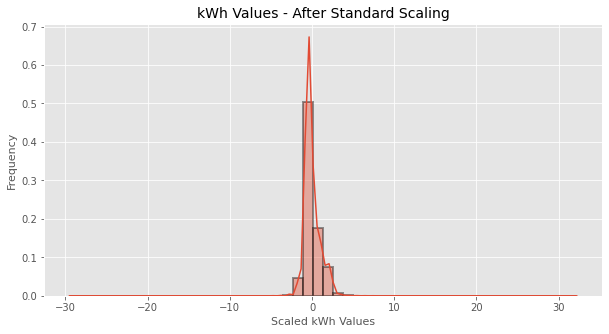

In [0]:
# Distribution after standarad scaling

plt.figure(figsize=(10, 5))
distplot(X_standard.ravel(), hist_kws=dict(edgecolor='k', linewidth=2))
plt.xlabel('Scaled kWh Values', fontsize=11)
plt.ylabel('Frequency', fontsize=11)
plt.title('kWh Values - After Standard Scaling', fontsize=14)

Text(0.5, 1.0, 'kWh Values - After MinMax Scaling')

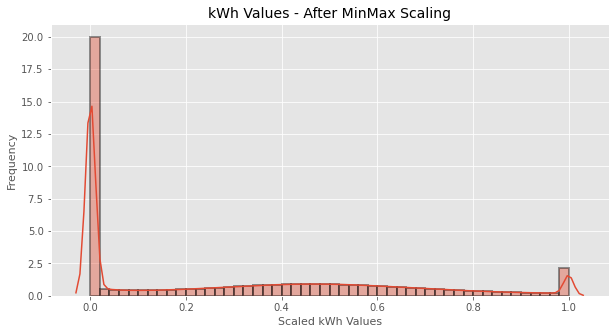

In [0]:
# Distribution after MinMax scaling

plt.figure(figsize=(10, 5))
distplot(X_MinMax.ravel(), hist_kws=dict(edgecolor='k', linewidth=2))
plt.xlabel('Scaled kWh Values', fontsize=11)
plt.ylabel('Frequency', fontsize=11)
plt.title('kWh Values - After MinMax Scaling', fontsize=14)

### PCA on standard scaled Data

In [0]:
# Applying PCA on Standard scaled data
pca_scaled_std = PCA(n_components=0.95) # no need to set solver, cause default is auto
X_reduced_scaled_std = pca_scaled_std.fit_transform(X_standard)

In [0]:
# Dimension Check
X_reduced_scaled_std.shape

(42372, 648)

In [0]:
# Variance Check
pca_scaled_std.explained_variance_ratio_

array([2.02720492e-01, 8.87556108e-02, 7.91670869e-02, 4.46811601e-02,
       3.73649954e-02, 3.07747890e-02, 2.06653184e-02, 1.80853907e-02,
       1.46794214e-02, 1.34450828e-02, 1.17329845e-02, 9.60064348e-03,
       8.70753972e-03, 7.75617655e-03, 6.77092528e-03, 6.28605804e-03,
       5.92353519e-03, 5.68144757e-03, 4.93162948e-03, 4.63318249e-03,
       4.37301446e-03, 4.29489432e-03, 3.96482537e-03, 3.84887976e-03,
       3.70422710e-03, 3.53715198e-03, 3.45095363e-03, 3.35165270e-03,
       3.18908217e-03, 3.02779523e-03, 2.84144995e-03, 2.79753062e-03,
       2.69167984e-03, 2.60849134e-03, 2.58047572e-03, 2.42244702e-03,
       2.41293051e-03, 2.29697541e-03, 2.25987428e-03, 2.20912967e-03,
       2.12417302e-03, 2.09266045e-03, 2.00855220e-03, 1.97547407e-03,
       1.93144147e-03, 1.87791982e-03, 1.84724709e-03, 1.82075287e-03,
       1.77873335e-03, 1.69983134e-03, 1.68046488e-03, 1.61196745e-03,
       1.61059610e-03, 1.56849781e-03, 1.54277404e-03, 1.52625179e-03,
      

### PCA on MinMax scaled Data

In [0]:
# Applying PCA on MinMax scaled Data
pca_scaled_MinMax = PCA(n_components=0.95)
X_reduced_scaled_MinMax = pca_scaled_MinMax.fit_transform(X_MinMax)

In [0]:
# Dimension Check
X_reduced_scaled_MinMax.shape

(42372, 400)

In [0]:
# Variance Check
pca_scaled_MinMax.explained_variance_ratio_

array([3.72008933e-01, 1.71336072e-01, 6.23987971e-02, 4.42965200e-02,
       3.17733348e-02, 2.37717872e-02, 1.75285677e-02, 1.32422604e-02,
       1.16918689e-02, 9.26872461e-03, 8.26350713e-03, 6.92257843e-03,
       6.13834899e-03, 5.47542804e-03, 4.55220057e-03, 4.04830863e-03,
       3.82981281e-03, 3.49223460e-03, 3.33418107e-03, 2.85822360e-03,
       2.68125370e-03, 2.52946937e-03, 2.50831065e-03, 2.29129398e-03,
       2.21587712e-03, 2.11052561e-03, 1.99803310e-03, 1.97619421e-03,
       1.91494419e-03, 1.83797226e-03, 1.80589601e-03, 1.59787858e-03,
       1.57878853e-03, 1.51128166e-03, 1.47265276e-03, 1.41176690e-03,
       1.36048454e-03, 1.32086512e-03, 1.30178161e-03, 1.25164936e-03,
       1.21466738e-03, 1.16170712e-03, 1.14913641e-03, 1.10185368e-03,
       1.09702175e-03, 1.06564207e-03, 1.02302034e-03, 1.01043262e-03,
       9.62557334e-04, 9.33104481e-04, 9.22716104e-04, 8.96001249e-04,
       8.81900135e-04, 8.77415373e-04, 8.56085496e-04, 8.40870157e-04,
      

# CUMSUM Plots

## Unscaled Data

In [0]:
pca_cumsum = PCA()
pca_cumsum.fit(kWhs)
cumsum = np.cumsum(pca_cumsum.explained_variance_ratio_)
dim = np.argmax(cumsum>= 0.95)+1
print(dim)

10


In [0]:
pca_cumsum.explained_variance_ratio_.shape

(1034,)

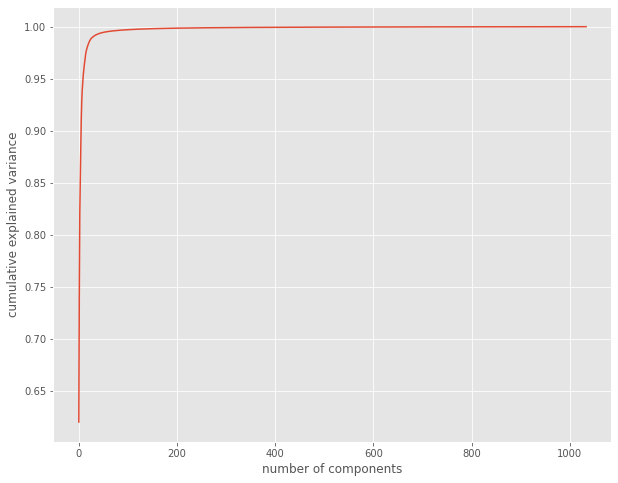

In [0]:
plt.figure(figsize=(10,8))
plt.plot(np.cumsum(pca_cumsum.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## Standard Scaled Data

In [0]:
pca_cumsum_std = PCA()
pca_cumsum_std.fit(X_standard)
cumsum_std = np.cumsum(pca_cumsum_std.explained_variance_ratio_)
dim_std = np.argmax(cumsum_std>= 0.95)+1
print(dim_std)

648


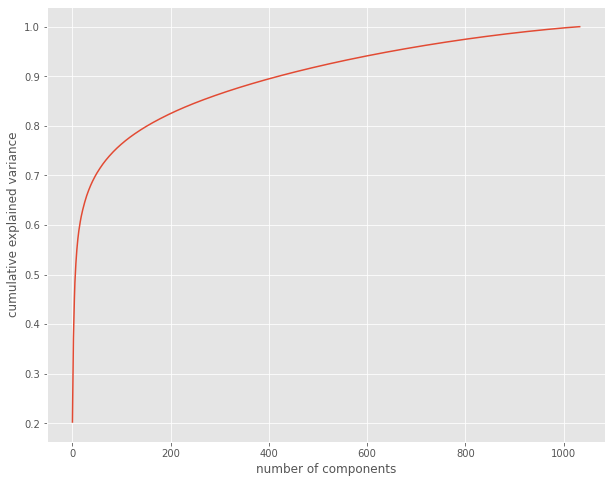

In [0]:
plt.figure(figsize=(10,8))
plt.plot(np.cumsum(pca_cumsum_std.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## MinMax Scaled Data

In [0]:
pca_cumsum_MinMax = PCA()
pca_cumsum_MinMax.fit(X_MinMax)
cumsum_MinMax = np.cumsum(pca_cumsum_MinMax.explained_variance_ratio_)
dim_MinMax = np.argmax(cumsum_MinMax>= 0.95)+1
print(dim_MinMax)

400


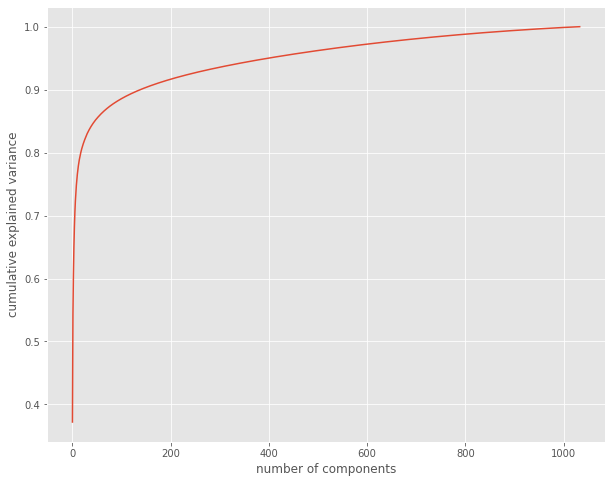

In [0]:
plt.figure(figsize=(10,8))
plt.plot(np.cumsum(pca_cumsum_MinMax.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# Feature Importance Experimentation

## Unscaled Data

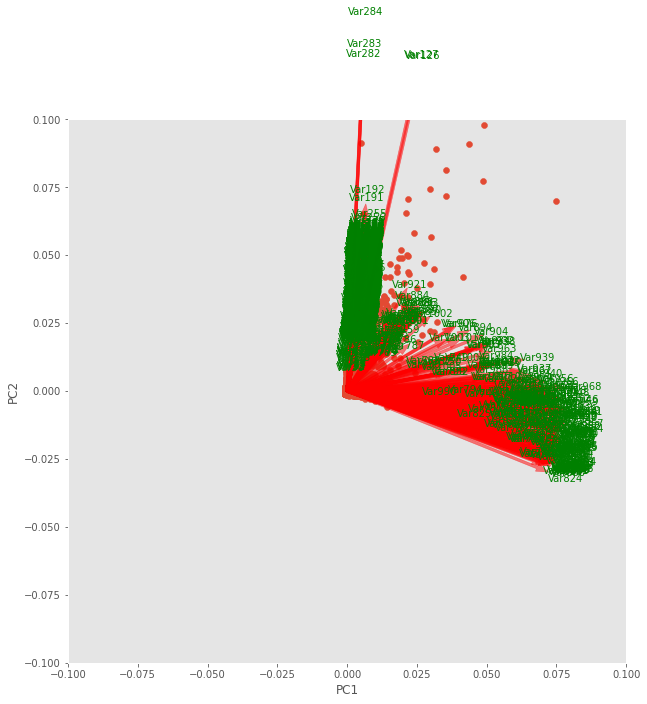

In [0]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = labels)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.figure(figsize=(10,10))
plt.xlim(-0.1,0.1)
plt.ylim(-0.1,0.1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(X_reduced[:,0:10],np.transpose(pca.components_[0:10, :]))
plt.show()


In [0]:
print(abs( pca.components_ ))

[[3.94302585e-03 3.77944426e-03 4.45528598e-03 ... 5.57082846e-02
  5.07048038e-02 4.59968042e-02]
 [3.14185930e-02 2.03005761e-02 2.28941637e-02 ... 8.32943704e-04
  7.25626079e-03 2.92571298e-04]
 [5.57330711e-03 4.10523042e-03 4.61932104e-03 ... 2.99520813e-04
  1.02776471e-03 5.43100543e-04]
 ...
 [9.09990604e-05 3.35998456e-02 3.32610451e-02 ... 1.94243290e-02
  1.26371367e-03 5.11342421e-04]
 [4.51233180e-03 8.75247351e-03 1.04725823e-02 ... 2.43466333e-03
  5.06504791e-03 1.78631791e-03]
 [2.04369720e-02 5.86433044e-02 7.53139907e-02 ... 1.75624016e-02
  5.36114994e-02 3.99066274e-02]]


In [0]:
n_pcs = pca.components_.shape[0]
print(n_pcs)

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = range(1,1034)
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

10


In [0]:
df['variance ratio'] = pca.explained_variance_ratio_

In [0]:
df.columns = ['principal components', ' feature number', 'variance ratio']

In [0]:
df

,principal components,feature number,variance ratio
0,PC0,924,0.620061
1,PC1,284,0.122121
2,PC2,282,0.079014
3,PC3,126,0.032394
4,PC4,181,0.029374
5,PC5,192,0.027722
6,PC6,127,0.017813
7,PC7,126,0.010682
8,PC8,25,0.007281
9,PC9,25,0.006779


Above table precits that the 924th feature in the original dataset is the most important, when the dimension is reduced on unscaled data. it holds about 62% variance. this ofc is just for experimenting. later on feature importance will be applied on scaled data and a dataframe with variance ration and absolute feature importance ratio will be generated/

## Standard Scaled Data

In [0]:
n_pcs_std = pca_scaled_std.components_.shape[0]
print(n_pcs_std)

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca_scaled_std.components_[i]).argmax() for i in range(n_pcs_std)]

initial_feature_names = range(1,1034)
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs_std)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs_std)}

# build the dataframe
df_std = pd.DataFrame(dic.items())

648


In [0]:
df_std['variance ratio'] = pca_scaled_std.explained_variance_ratio_

In [0]:
df_std.columns = ['principal components', ' feature number', 'variance ratio']

In [0]:
df_std.head(20)

,principal components,feature number,variance ratio
0,PC0,962,0.202720
1,PC1,46,0.088756
2,PC2,940,0.079167
3,PC3,25,0.044681
4,PC4,768,0.037365
5,PC5,414,0.030775
6,PC6,769,0.020665
7,PC7,717,0.018085
8,PC8,30,0.014679
9,PC9,415,0.013445


# Training SVM on Standard scaled Reduced Data

In [0]:
# 80 20 split
X_train, X_test, y_train, y_test = train_test_split(X_reduced_scaled_std, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    stratify=labels)

In [0]:
X_train.shape

(33897, 648)

In [0]:
y_train.shape

(33897,)

In [0]:
X_reduced_scaled_std.shape

(42372, 648)

In [0]:
from sklearn import svm
# building model with zheng's params
svc_zheng_std = svm.SVC(C=1.0, kernel='rbf', random_state=0, probability = True, verbose=True)

In [0]:
import time

# Record start time 
t_start = time.time() 

# Fit the SVC
svc_zheng_std.fit(X_train, y_train)

# Record end time 
t_end = time.time()

# Print time for training
print((t_end - t_start) / 60)

[LibSVM]120.97143535614013


In [0]:
def get_classification_result(estimator, X, y_true, classifier_name=None, 
                              normalize_conf_mat='all'):
  # Get the predicted classes for this classifier
  y_pred = estimator.predict(X)

  # Display the classification report
  print("CLASSIFICATION REPORT")
  print(classification_report(y_true, y_pred, labels=[0, 1], 
                              target_names=['Regular Consumer', 'Thief']))
  
  # Confusion Matrix processing 
  if (normalize_conf_mat=='rows'):
    normalize = 'true'
  elif normalize_conf_mat=='cols':
    normalize = 'pred'
  else:
    normalize = normalize_conf_mat

  # Use built-in function to get confusion matrix
  conf_mat_display = plot_confusion_matrix(estimator, 
                                           X, y_true, 
                                           labels=[0, 1], 
                                           normalize=normalize,
                                           display_labels=['Regular Consumers', 'Thieves'], 
                                           cmap='Blues')
  
  # Render the confusion matrix
  print(conf_mat_display.confusion_matrix)

  # Do not render the grid lines in the confusion matrix
  plt.grid(False)

  # Add a title to the confusion matrix
  conf_mat_display.ax_.set_title('Confusion Matrix' + 
                                 ('' if classifier_name is None else ' - {}'.format(classifier_name)), 
                                 fontsize=18)
  
  # Display ROC curve
  roc_curve_display = plot_roc_curve(estimator, X, y_true)
  roc_curve_display.ax_.set_title('ROC Curve' + ('' if classifier_name is None 
                                     else ' - {}'.format(classifier_name)), 
               fontsize=18);


CLASSIFICATION REPORT
                  precision    recall  f1-score   support

Regular Consumer       0.92      1.00      0.96      7752
           Thief       0.92      0.02      0.03       723

        accuracy                           0.92      8475
       macro avg       0.92      0.51      0.49      8475
    weighted avg       0.92      0.92      0.88      8475

[[9.14572271e-01 1.17994100e-04]
 [8.38938053e-02 1.41592920e-03]]


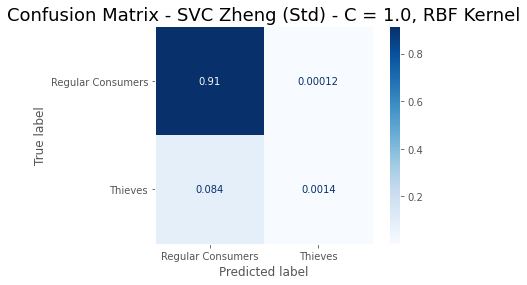

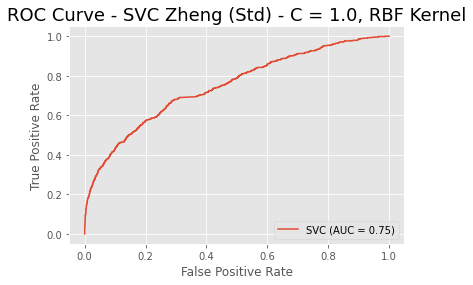

In [0]:
# Scikit-Learn imports - Classification resutlts
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve, roc_auc_score

get_classification_result(estimator=svc_zheng_std, 
                          X=X_test, 
                          y_true=y_test, 
                          classifier_name='SVC Zheng (Std) - C = 1.0, RBF Kernel')

In [0]:
from joblib import dump, load
dump(svc_zheng_std, 'SVC_Zheng_80%_STD_PCA.joblib') 

['SVC_Zheng_80%_STD_PCA.joblib']